In [1]:
import os
import json
import pandas as pd
from src.gender import gender
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())

In [2]:
df = vycisti(df, opravy)

2023/06/01 14:18:27 z 4555 řádků odstraněno 133. Aktuální dataframe má 4422 řádků.


In [3]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]

In [4]:
dve_pohlavi = ["muž","žena"]

## Herectvo

In [5]:
hcfhraji = hcf[["Film","Copyright","Režie","Scénář","Původní filmový námět","Hrají","Typologie"]]

In [6]:
def hlrole(x):
    try:
        x = x[0]
    except:
        x = x
    return x

In [7]:
hcfhraji["Hlavní role"] = hcfhraji["Hrají"].apply(lambda x: hlrole(x))

C:\Users\micha\AppData\Local\Temp\ipykernel_28112\3404391821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcfhraji["Hlavní role"] = hcfhraji["Hrají"].apply(lambda x: hlrole(x))


In [8]:
hcfhraji["Gender hlavní role"] = hcfhraji["Hlavní role"].apply(lambda x: gender(x, zeny, nelide))

C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2976082911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcfhraji["Gender hlavní role"] = hcfhraji["Hlavní role"].apply(lambda x: gender(x, zeny, nelide))


In [9]:
hcfhraji[["Film","Hlavní role","Gender hlavní role"]].sample(5)

,Film,Hlavní role,Gender hlavní role
2825,Modré z nebe (397424),Martin Filip,muž
2808,Třetí princ (397364),Libuše Šafránková (2272),žena
2192,Kolonie Lanfieri (396830),Juozas Budrajtis,muž
319,Falešná kočička (395366),Vlasta Burian (11992),muž
1370,Expres z Norimberka (396172),Ludmila Vendlová (128953),žena


In [10]:
pomer_hl_roli = pd.Series(hcfhraji[hcfhraji["Gender hlavní role"] == "žena"].groupby("Copyright")["Hlavní role"].nunique() / hcfhraji[(hcfhraji["Gender hlavní role"] == "muž") | (hcfhraji["Gender hlavní role"] == "žena")].groupby("Copyright")["Hlavní role"].nunique())

<AxesSubplot:xlabel='Copyright'>

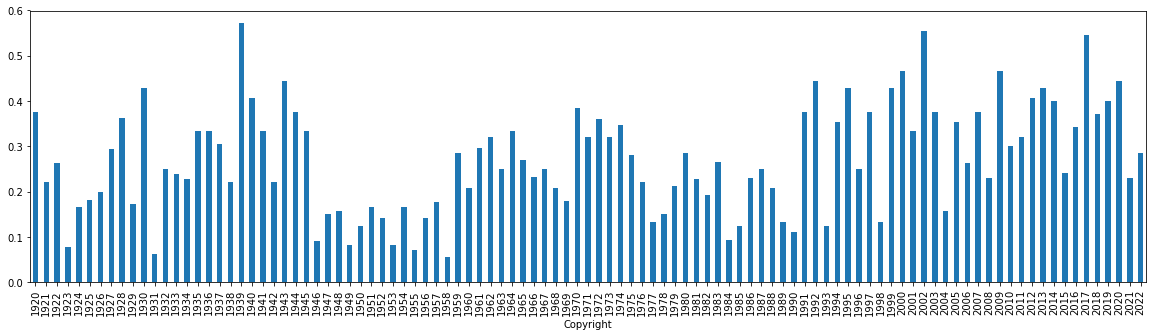

In [11]:
pomer_hl_roli.plot.bar(figsize=(20,5))

In [12]:
hcfhraji = hcfhraji.explode("Hrají")

In [13]:
hcfhraji["Gender"] = hcfhraji["Hrají"].apply(lambda x: gender(x, zeny, nelide))

In [14]:
def pomer_herecek(dataframe):
    pomer = pd.Series(dataframe[dataframe["Gender"] == "žena"].groupby("Film")["Hrají"].nunique().sum() / dataframe[(dataframe["Gender"] == "muž") | (dataframe["Gender"] == "žena")].groupby("Film")["Hrají"].nunique().sum())
    return pomer

In [15]:
herecky_celkem = pomer_herecek(hcfhraji)
herecky_celkem

0    0.306883
dtype: float64

In [16]:
herecky_7398 = pomer_herecek(hcfhraji[(hcfhraji["Copyright"]) >= 1973 & (hcfhraji["Copyright"] < 1999)])
herecky_7398

0    0.306883
dtype: float64

In [17]:
herecky_99 = pomer_herecek(hcfhraji[hcfhraji["Copyright"] >= 1999])
herecky_99

0    0.364441
dtype: float64

In [18]:
tempo = (herecky_99-herecky_7398) / 25
rok = 2010
podil = herecky_99
while float(podil) < 0.51:
    rok = rok + 1
    podil = podil + tempo
    if float(podil) > 0.49:
        print(f"{int(rok)}: {float(podil)}")

2065: 0.4910704442466935
2066: 0.4933727901985655
2067: 0.4956751361504375
2068: 0.4979774821023095
2069: 0.5002798280541815
2070: 0.5025821740060534
2071: 0.5048845199579254
2072: 0.5071868659097973
2073: 0.5094892118616693
2074: 0.5117915578135412


C:\Users\micha\AppData\Local\Temp\ipykernel_28112\3207822581.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  while float(podil) < 0.51:
C:\Users\micha\AppData\Local\Temp\ipykernel_28112\3207822581.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if float(podil) > 0.49:
C:\Users\micha\AppData\Local\Temp\ipykernel_28112\3207822581.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"{int(rok)}: {float(podil)}")


## Herectvo

In [19]:
herectvo = vycisti(pd.read_json(os.path.join("data", "herectvo.json")), opravy)

2023/06/01 14:18:47 z 108843 řádků odstraněno 105456. Aktuální dataframe má 3387 řádků.


In [20]:
herectvo

,Film,Role,Hraje,Mluví
30,Eastern – Krvavý Hugo (10173),Krvavý Hugo,Štefan Capko,NaN
39,O Ječmínkovi (102282),Marína,Ester Geislerová (7019),NaN
56,Zimní víla (102314),Kateřina,Nikola Votočková (29255),NaN
67,Jan Hus – mše za tři mrtvé muže (103341),český reformní kazatel Jan Hus,Milan Stehlík (40306),NaN
91,Občanský průkaz (103354),Petr,Libor Kovář (76614),NaN
...,...,...,...,...
108642,O perlové panně (9735),Kornelius,Jaromír Hanzlík (14425),NaN
108670,Výchova dívek v Čechách (9736),Beáta,Anna Geislerová (5433),NaN
108695,Hotel Sarajevo aneb Sny obyčejného svatebčana ...,básník a voják /povídka Hotel Sarajevo.../,Eduardo R. Flores,NaN
108708,Zdivočelá země (9738),Maděra,Martin Dejdar (2979),NaN


In [21]:
herectvo = herectvo.explode("Role")

In [22]:
herectvo["Hraje"].sample(10)

22902        Adina Mandlová (55611)
35077       Zdeněk Štěpánek (87457)
17003       Jindřich Plachta (5829)
6679        Eva Salzmannová (11899)
13563        Josef Rovenský (37766)
97664      Petra Hřebíčková (18870)
14677      Saša Rašilov st. (53327)
34420         Rudolf Jelínek (6133)
35343       Vlastimil Brodský (833)
35887    Radoslav Brzobohatý (2770)
Name: Hraje, dtype: object

In [23]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [24]:
herectvo = herectvo.merge(persony, left_on = "Hraje", right_on = "Jméno")

In [25]:
herectvo = herectvo.merge(df[["Film","Copyright"]], on="Film", how = "inner")

In [26]:
herectvo["Věk"] = herectvo["Copyright"] - herectvo["Rok narození"]

In [27]:
herectvo[herectvo["Věk"] < 1]

,Film,Role,Hraje,Mluví,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí,Copyright,Věk
1176,Babinský (395277),None,Ladislav Pech (131498),NaN,Ladislav Pech (131498),131498,"herec, divadelní režisér",fyzická,None,None,1966-10-21T00:00:00.000,"Praha, Rakouské císařství",1942-07-07T00:00:00.000,"Brno, Československo",Praha,Rakouské císařství,Československo,Československo,1966.0,1942.0,1922,-44.0


In [28]:
herectvo = herectvo[herectvo["Věk"] > 0]

In [29]:
persony.shape

(35457, 16)

In [30]:
herectvo.shape

(3885, 22)

In [31]:
herectvo[herectvo["Role"].str.lower().str.contains("princ",na=False)][["Hraje","Copyright","Role","Věk"]].sort_values(by="Věk",ascending=False).head(50)

,Hraje,Copyright,Role,Věk
3790,Arnošt Goldflam (1579),1990,principál a herec Karel Vyžilý,44.0
3115,Ivan Palúch (6638),1971,princ Bajaja,31.0
3114,Ivan Palúch (6638),1971,princ Bajaja,31.0
635,Libuše Šafránková (2272),1982,princezna Milena,29.0
636,Libuše Šafránková (2272),1982,princezna Milena,29.0
637,Libuše Šafránková (2272),1982,princezna ze skal,29.0
638,Libuše Šafránková (2272),1982,princezna ze skal,29.0
2368,Vlasta Fialová (5062),1956,princezna Mechmene Banu,28.0
3889,Aleš Bílík (87908),2016,princ Václav,27.0
1058,Karel Lamač (37847),1923,princ Edgar z Georgie,26.0


In [32]:
zanry = df[["Film","Žánr"]]

In [33]:
zanry

,Film,Žánr
0,Alarm staroměstských hasičů (401719),reportáž
1,Smích a pláč (395110),anekdota
2,Dostaveníčko ve mlýnici (395109),fraška
3,Žofínská plovárna (401718),reportáž
4,Voltýžování jízdního odboru Sokola pražského (...,"[reportáž, sportovní]"
...,...,...
4550,Zuza v zahradách (402223),dětský
4551,Mimi & Líza (402224),"[pohádka, povídkový]"
4552,Jan Žižka (402240),"[drama, historický, akční]"
4553,Idiot (402230),"[drama, záznam divadelní inscenace]"


In [34]:
zanry.explode("Žánr").groupby("Žánr")["Film"].nunique().nlargest(50)

Žánr
komedie              955
drama                635
psychologický        394
příběh               229
povídka              227
pohádka              218
reklamní             217
dětský               190
historický           162
melodrama            153
dokument             129
kriminální           118
etuda                110
hudební              107
životopisný          106
satira                93
dobrodružný           86
hořká komedie         78
groteska              77
povídkový             77
osvětový              71
reportáž              71
rodinný               68
politický             67
detektivní            66
sociální              65
tragikomedie          58
umělecký              58
válečný               49
fantastický           45
medailon              45
smutná komedie        43
poetický              41
thriller              41
časosběrný            41
podobenství           40
sportovní             40
esej                  39
propagační            39
road movie          

In [35]:
pohadky = ["pohádka","dětský","rodinný"]

In [36]:
herectvo = herectvo.merge(zanry, on="Film")

In [37]:
herectvo = herectvo.explode("Žánr")

In [38]:
herectvo[(herectvo["Role"].str.lower().str.contains("důchodce",na=True,regex=True))].groupby(["Jméno","Film","Role"])["Věk"].max().nsmallest(20)

Jméno                       Film                                      Role          
Otomar Korbelář (126899)    Brankář bydlí v naší ulici (396294)       důchodce Šácha    58.0
Jaroslav Radimecký (36619)  Stalo se v Brazílii (397432)              důchodce Jan      63.0
Ladislav Pešek (53326)      Príhoda z hotelovej reštaurácie (397092)  důchodce          70.0
Name: Věk, dtype: float64

In [39]:
princove = pd.DataFrame(herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max())
princove.sort_values(by="Věk",ascending=False)

,,,Věk
Jméno,Film,Role,
Ivan Palúch (6638),Princ Bajaja (396912),princ Bajaja,31.0
Aleš Bílík (87908),Řachanda (400701),princ Václav,27.0


In [40]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

29.0

In [41]:
herectvo[(herectvo["Role"].str.lower().str.contains("princ[^\w]",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

29.0

In [42]:
princezny = pd.DataFrame(herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=True,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().nlargest(20))
princezny

Věk
Jméno                      Film                                            Role                         
Libuše Šafránková (2272)   Třetí princ (397364)                            princezna Milena         29.0
                                                                           princezna ze skal        29.0
Vlasta Fialová (5062)      Legenda o lásce (396257)                        princezna Mechmene Banu  28.0
Eva Josefíková (76909)     Čertova nevěsta (164346)                        princezna Štěpánka       21.0
Helena Vondráčková (12227) Šíleně smutná princezna (396779)                princezna Helena         21.0
Alena Vránová (4984)       Pyšná princezna (396140)                        princezna Krasomila      20.0
Lenka Jelínková (27185)    Jak si zasloužit princeznu (8142)               princezna Verunka        20.0
Michaela Kuklová (3313)    O princezně Jasněnce a létajícím ševci (397549) princezna Jasněnka       19.0

In [43]:
len(princove[princove["Věk"] > princezny["Věk"].max()])

1

In [44]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=False,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().median()

21.0

In [45]:
herectvo[(herectvo["Role"].str.lower().str.contains("princezna",na=False,regex=True)) & herectvo["Žánr"].isin(pohadky)].groupby(["Jméno","Film","Role"])["Věk"].max().mean()

23.375

In [46]:
herectvo.groupby("Jméno")["Věk"].max().nlargest()

Jméno
Josef Vystrčil (23371)       88.0
Soňa Červená (10930)         85.0
Jaroslava Adamová (11226)    84.0
Miloš Čtrnáctý (131479)      83.0
Antonín Soukup (87404)       82.0
Name: Věk, dtype: float64

In [47]:
herectvo["Gender"] = herectvo["Jméno"].apply(lambda x: gender(x, zeny, nelide))

In [48]:
vyplneno = pd.Series(herectvo.groupby("Jméno")["Rok narození"].first(), name="vyplneno")
print(vyplneno[~vyplneno.isnull()].index.nunique())
print((vyplneno[vyplneno.isnull()].index.nunique()))

1149
0


In [49]:
distribuce = pd.DataFrame(herectvo.groupby(["Film","Copyright","Jméno","Věk","Gender"])["Rok úmrtí"].first().reset_index())

In [50]:
distribuce[distribuce["Rok úmrtí"].isnull()]

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Růžena Rudnická (126527),27.0,žena,NaN
2,...a pozdravuji vlaštovky (396886),1972,Magda Vášáryová (31019),24.0,žena,NaN
3,...a zase ta Lucie! (397427),1983,Žaneta Fuchsová (36216),11.0,žena,NaN
5,...ani smrt nebere! (8552),1995,Břetislav Rychlík (7392),37.0,muž,NaN
6,...koně na betoně (8480),1995,Milka Zimková (56848),44.0,žena,NaN
...,...,...,...,...,...,...
2926,„24“ (5478),2001,Martin Trnavský (1211),31.0,muž,NaN
2927,„Babičky dobíjejte přesně!“ (397426),1983,Jiří Lábus (838),33.0,muž,NaN
2928,"„Já to tedy beru, šéfe...!“ (397161)",1977,Iva Janžurová (1049),36.0,žena,NaN
2931,"„Pane, vy jste vdova!“ (396881)",1970,Iva Janžurová (1049),29.0,žena,NaN


In [51]:
distribuce

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Růžena Rudnická (126527),27.0,žena,NaN
1,...a odpusť jim jejich viny (397708),1992,Petr Čepek (4764),52.0,muž,1994.0
2,...a pozdravuji vlaštovky (396886),1972,Magda Vášáryová (31019),24.0,žena,NaN
3,...a zase ta Lucie! (397427),1983,Žaneta Fuchsová (36216),11.0,žena,NaN
4,...a život jde dál... (395701),1935,L. H. Struna (126711),36.0,muž,1980.0
...,...,...,...,...,...,...
2930,"„Marečku, podejte mi pero!“ (397112)",1976,Jiří Sovák (5288),56.0,muž,2000.0
2931,"„Pane, vy jste vdova!“ (396881)",1970,Iva Janžurová (1049),29.0,žena,NaN
2932,„Rakev ve snu viděti...“ (396781),1968,Bohumil Šmída (31114),54.0,muž,1989.0
2933,„Zavřeno pro rodinný smutek“ (397686),1991,Jakub Špalek (14566),23.0,muž,NaN


In [52]:
distribuce = distribuce[(distribuce["Rok úmrtí"] >= (distribuce["Copyright"] + 2)) | (distribuce["Rok úmrtí"].isnull())]

In [53]:
distribuce

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
0,"...A bílá bledla, až celkem ztmavla (397394)",1983,Růžena Rudnická (126527),27.0,žena,NaN
1,...a odpusť jim jejich viny (397708),1992,Petr Čepek (4764),52.0,muž,1994.0
2,...a pozdravuji vlaštovky (396886),1972,Magda Vášáryová (31019),24.0,žena,NaN
3,...a zase ta Lucie! (397427),1983,Žaneta Fuchsová (36216),11.0,žena,NaN
4,...a život jde dál... (395701),1935,L. H. Struna (126711),36.0,muž,1980.0
...,...,...,...,...,...,...
2930,"„Marečku, podejte mi pero!“ (397112)",1976,Jiří Sovák (5288),56.0,muž,2000.0
2931,"„Pane, vy jste vdova!“ (396881)",1970,Iva Janžurová (1049),29.0,žena,NaN
2932,„Rakev ve snu viděti...“ (396781),1968,Bohumil Šmída (31114),54.0,muž,1989.0
2933,„Zavřeno pro rodinný smutek“ (397686),1991,Jakub Špalek (14566),23.0,muž,NaN


In [54]:
distribuce[distribuce["Film"] == "Vlastníci (402008)"]

,Film,Copyright,Jméno,Věk,Gender,Rok úmrtí
2490,Vlastníci (402008),2019,Tereza Voříšková (26752),30.0,žena,NaN


In [55]:
distribuce.groupby("Film")["Věk"].mean().nlargest(10)

Film
Pomalu, ale slábnu (78814)    88.0
Zítra se bude... (156370)     85.0
Stínu neutečeš (58832)        84.0
Podvodníci (396631)           83.0
Poslední rozhovor (396962)    82.0
Ďábel (396930)                82.0
Babička I., II. (396899)      81.0
Vrásky z lásky (160354)       81.0
Na střeše (401893)            80.0
Causa Králík (397253)         78.0
Name: Věk, dtype: float64

In [56]:
distribuce.groupby("Film")["Věk"].mean().nsmallest(10)

Film
Červená Karkulka (402180)                5.0
Hry a sny (396335)                       6.0
Kapr (396572)                            6.0
Magdalena (396574)                       6.0
Nefňukej, veverko! (397602)              6.0
Příušnice (400098)                       6.0
Slon zachráncem (395661)                 6.0
Veverka a kouzelná mušle (397591)        6.0
Dobrodružství s nahým klukem (396615)    7.0
Máte doma lva? (396539)                  7.0
Name: Věk, dtype: float64

<AxesSubplot:ylabel='Frequency'>

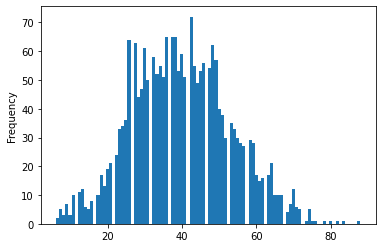

In [57]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].plot.hist(bins=98)

<AxesSubplot:ylabel='Frequency'>

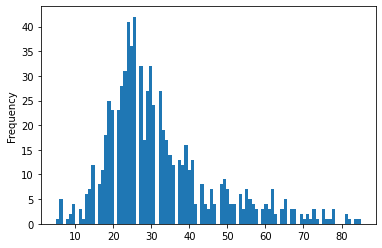

In [58]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].plot.hist(bins=95)

In [59]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].median()

39.0

In [60]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].median()

29.0

In [61]:
distribuce[distribuce["Gender"] == "muž"]["Věk"].mode()

0    42.0
Name: Věk, dtype: float64

In [62]:
distribuce[distribuce["Gender"] == "žena"]["Věk"].mode()

0    26.0
Name: Věk, dtype: float64

In [63]:
distribuce[(distribuce["Copyright"] >= 2003) & (distribuce["Gender"] == "muž")]["Věk"].median()

44.0

In [64]:
distribuce[(distribuce["Copyright"] >= 2003) & (distribuce["Gender"] == "žena")]["Věk"].median()

37.0

<AxesSubplot:ylabel='Frequency'>

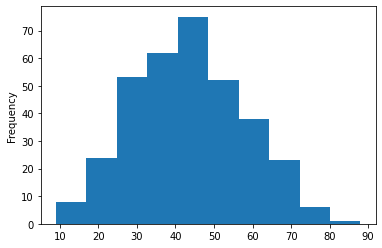

In [65]:
distribuce[(distribuce["Copyright"] >= 1998) & (distribuce["Gender"] == "muž")]["Věk"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

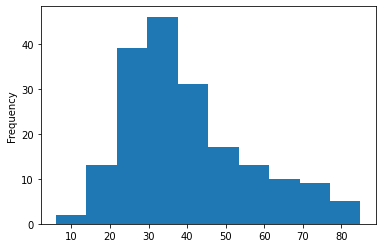

In [66]:
distribuce[(distribuce["Copyright"] >= 1998) & (distribuce["Gender"] == "žena")]["Věk"].plot.hist()

## Režisérstvo

In [67]:
reziserstvo = df[["Copyright","Typologie","Délka","Žánr","Film","Režie"]]

In [68]:
reziserstvo = reziserstvo.explode("Režie").explode("Typologie").explode("Délka")

In [69]:
reziserstvo["Gender"] = reziserstvo["Režie"].apply(lambda x: gender (x, zeny, nelide))

In [70]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]

,Copyright,Typologie,Délka,Žánr,Film,Režie,Gender
3478,2003,dokumentární,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3478,2003,distribuční,dlouhometrážní,dokument,Ničeho nelituji (26300),Theodora Remundová (5425),žena
3479,2003,animovaný,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3479,2003,distribuční,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
3479,2003,studentský,krátkometrážní,komedie,Čapí film (25375),Denisa Grimmová (9607),žena
...,...,...,...,...,...,...,...
4549,2022,distribuční,dlouhometrážní,medailon,Identita ES (402166),Alena Činčerová (5732),žena
4550,2022,animovaný,krátkometrážní,dětský,Zuza v zahradách (402223),Lucie Sunková (8767),žena
4550,2022,distribuční,krátkometrážní,dětský,Zuza v zahradách (402223),Lucie Sunková (8767),žena
4552,2022,hraný,dlouhometrážní,"[drama, historický, akční]",Jan Žižka (402240),Alice Hurychová (81624),žena


In [71]:
reziserstvo[(reziserstvo["Gender"] == "žena")]["Film"].nunique() / reziserstvo["Film"].nunique()

0.1013116236996834

In [72]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique() / reziserstvo[(reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.05626450116009281

In [73]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003)]["Film"].nunique()

0.2378167641325536

In [74]:
reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Copyright"] >= 2003)]["Film"].nunique() / reziserstvo[(reziserstvo["Copyright"] >= 2003) & (reziserstvo["Typologie"] == "hraný")]["Film"].nunique()

0.15257352941176472

<AxesSubplot:xlabel='Copyright'>

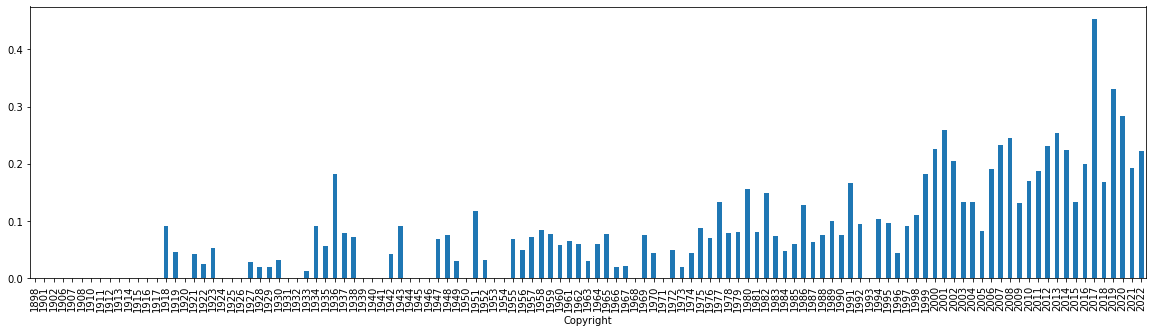

In [75]:
pomer_reziserek = pd.Series(reziserstvo[reziserstvo["Gender"] == "žena"].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo.groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

<AxesSubplot:xlabel='Copyright'>

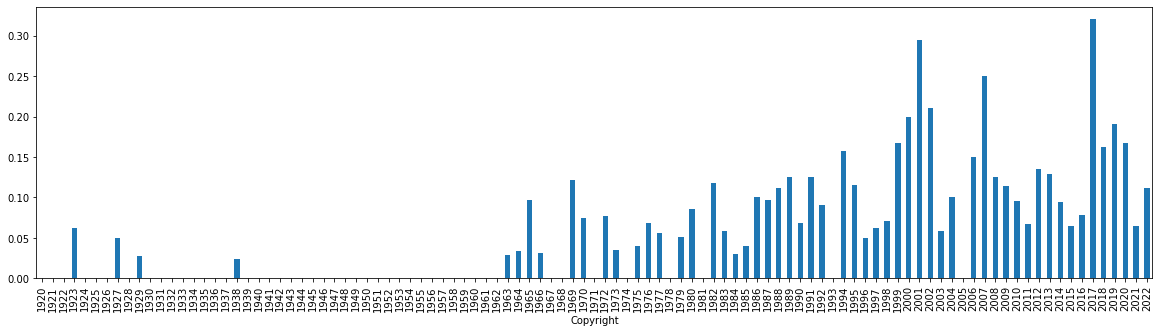

In [76]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "hraný") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

In [77]:
reziserstvo[reziserstvo["Gender"] == "žena"].groupby("Režie")[["Copyright","Film","Typologie"]].min().sort_values(by="Copyright")

,Copyright,Film,Typologie
Režie,,,
Olga Rautenkranzová (80115),1918,Kozlonoh (395165),distribuční
Thea Červenková (73006),1919,Babička (395236),distribuční
Květoslava Semonická (128168),1927,Ve spárech upíra (395423),distribuční
Hermína Týrlová (4754),1928,Co jim schází? (398629),animovaný
Ada Pellová-Czivišová (55927),1929,Cikánská láska (395810),distribuční
...,...,...,...
Mária Pinčíková (122068),2021,Na značky! (402115),distribuční
Vera Lacková (105595),2021,Jak jsem se stala partyzánkou (402160),distribuční
Adéla Špaljová (3107),2021,Nebe (402085),distribuční


In [78]:
typy = reziserstvo["Typologie"].drop_duplicates().to_list()

In [79]:
for t in typy:
    try:
        mu = reziserstvo[(reziserstvo["Copyright"] >= 1998) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[0]
        ze = reziserstvo[(reziserstvo["Copyright"] >= 1998) & (reziserstvo["Typologie"] == t)].groupby("Gender")["Film"].nunique().iloc[1]
        print(f"""{t}: {ze/(ze+mu)}, m: {mu}, ž: {ze}""")
    except:
        print(f"""{t}: m: {mu}, ž: {ze}""")

dokumentární: 0.31733333333333336, m: 256, ž: 119
distribuční: 0.23076923076923078, m: 910, ž: 273
hraný: 0.15114503816793892, m: 556, ž: 99
animovaný: 0.36024844720496896, m: 103, ž: 58
studentský: 0.46923076923076923, m: 69, ž: 61
nedistribuční: m: 4, ž: 61
středometrážní: m: 4, ž: 61
krátkometrážní: 0.3, m: 7, ž: 3


<AxesSubplot:xlabel='Copyright'>

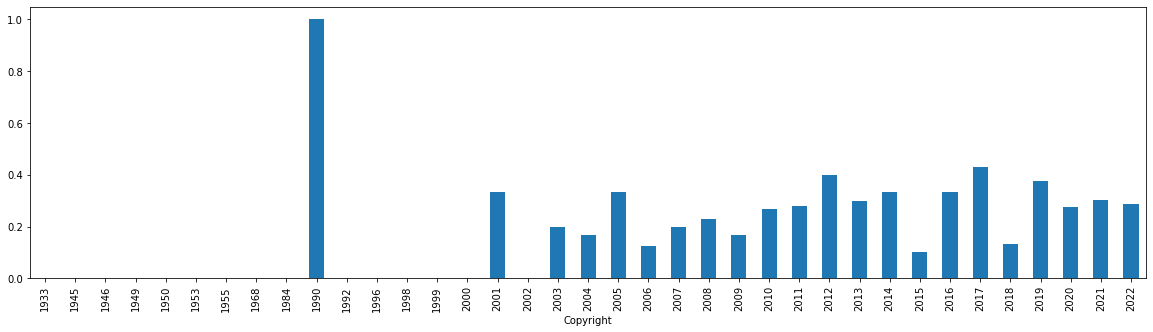

In [80]:
pomer_reziserek = pd.Series(reziserstvo[(reziserstvo["Gender"] == "žena") & (reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum() / reziserstvo[(reziserstvo["Typologie"] == "dokumentární") & (reziserstvo["Délka"] == "dlouhometrážní")].groupby(["Copyright","Režie"])["Film"].nunique().groupby("Copyright").sum())
pomer_reziserek.plot.bar(figsize = (20,5))

## Různé profese

In [81]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [82]:
fyzicke = persony[persony["Osoba"] != "právní"]

In [83]:
def profesni_pomery(frame, persony, prvni=True):
    global nelide
    pomery = {}
    for p in seznamy["profese"]:
        df_pracovni = frame[["Film","Copyright",p]].explode(p)
        df_pracovni = df_pracovni.merge(persony[["Jméno","Osoba"]], left_on = p, right_on = "Jméno", how="outer")
        df_pracovni = df_pracovni[~df_pracovni["Jméno"].isin(nelide)]
        df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x, zeny, nelide))
        stats = []
        stats.append(df_pracovni.groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "muž"].groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum())
        stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum())
        if prvni:
            stats.append(df_pracovni[df_pracovni["Gender profese"] == "muž"]["Copyright"].min())
            stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"]["Copyright"].min())
        pomery[p] = stats
    pomery = pd.DataFrame.from_dict(pomery).transpose().rename(columns={0: "Celkem", 1: "Mužů", 2: "Žen", 3: "Podíl žen", 4: "První muž", 5: "První žena"})
    return pomery.sort_values(by="Podíl žen",ascending=False)

In [84]:
pp = profesni_pomery(df, fyzicke)
pp

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Skript,1179.0,54.0,1125.0,0.954198,1944.0,1938.0
Asistent střihu,1532.0,185.0,1347.0,0.879243,1945.0,1945.0
Kostýmy,3786.0,656.0,3130.0,0.826730,1931.0,1931.0
Zástupce vedoucího produkce,403.0,107.0,296.0,0.734491,1991.0,1991.0
Návrhy kostýmů,2027.0,745.0,1282.0,0.632462,1922.0,1932.0
Asistent vedoucího produkce,726.0,335.0,391.0,0.538567,1992.0,1952.0
Produkce,1366.0,685.0,681.0,0.498536,1935.0,1954.0
Masky,5226.0,2802.0,2423.0,0.463732,1926.0,1945.0
Vedoucí produkce,1176.0,669.0,507.0,0.431122,1991.0,1993.0
České podtitulky,184.0,113.0,70.0,0.382514,1996.0,1936.0


In [85]:
pp["Zpoždění"] = pp["První žena"] - pp["První muž"]
pp.sort_values(by="Zpoždění",ascending=False)

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena,Zpoždění
Hudba k písni,42.0,40.0,2.0,0.047619,1933.0,2003.0,70.0
Hudební režie,167.0,151.0,16.0,0.095808,1933.0,2002.0,69.0
Dirigent,132.0,126.0,6.0,0.045455,1932.0,2000.0,68.0
Výběr hudby,44.0,42.0,2.0,0.045455,1945.0,2010.0,65.0
Druhá kamera,2059.0,2017.0,42.0,0.020398,1913.0,1974.0,61.0
Asistent zvuku,522.0,482.0,40.0,0.076628,1932.0,1992.0,60.0
Zvláštní efekty,791.0,769.0,6.0,0.007742,1928.0,1983.0,55.0
Asistent kamery,3891.0,3817.0,68.0,0.017503,1919.0,1972.0,53.0
Producent,2904.0,2173.0,729.0,0.251206,1939.0,1991.0,52.0
Zvuk,7909.0,7322.0,337.0,0.044001,1929.0,1979.0,50.0


In [86]:
profesni_pomery(hcf, fyzicke)

,Celkem,Mužů,Žen,Podíl žen,První muž,První žena
Skript,1059.0,41.0,1018.0,0.961284,1944.0,1938.0
Asistent střihu,1317.0,116.0,1201.0,0.911921,1965.0,1945.0
Kostýmy,3542.0,619.0,2923.0,0.825240,1931.0,1931.0
Zástupce vedoucího produkce,311.0,90.0,221.0,0.710611,1991.0,1991.0
Návrhy kostýmů,1859.0,695.0,1164.0,0.626143,1922.0,1932.0
Asistent vedoucího produkce,443.0,220.0,223.0,0.503386,1992.0,1991.0
Produkce,621.0,327.0,294.0,0.473430,1981.0,1992.0
Masky,4839.0,2593.0,2245.0,0.464035,1926.0,1945.0
Vedoucí produkce,743.0,431.0,312.0,0.419919,1991.0,1993.0
Účinkují,43.0,25.0,18.0,0.418605,1998.0,2003.0


In [87]:
profesni_pomery(df[df["Copyright"] >= 1998], fyzicke, prvni=False)

,Celkem,Mužů,Žen,Podíl žen
Skript,265.0,40.0,225.0,0.849057
Kostýmy,896.0,139.0,757.0,0.844866
Návrhy kostýmů,708.0,159.0,549.0,0.775424
Zástupce vedoucího produkce,352.0,81.0,271.0,0.769886
Asistent vedoucího výroby,4.0,1.0,3.0,0.750000
Masky,1476.0,407.0,1068.0,0.724068
Assistent architekta,109.0,47.0,62.0,0.568807
Zástupce vedoucího výroby,183.0,79.0,104.0,0.568306
Asistent vedoucího produkce,691.0,321.0,370.0,0.535456
Dialogy české verze,25.0,12.0,13.0,0.520000


In [88]:
profesni_pomery(hcf[hcf["Copyright"] >= 1998], fyzicke, prvni=False)

C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2156053058.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Gender profese"] == "žena"].groupby("Film")[p].nunique().sum() / df_pracovni[df_pracovni["Gender profese"].isin(dve_pohlavi)].groupby("Film")[p].nunique().sum())


,Celkem,Mužů,Žen,Podíl žen
Skript,239.0,29.0,210.0,0.878661
Kostýmy,850.0,130.0,720.0,0.847059
Návrhy kostýmů,631.0,142.0,489.0,0.774960
Zástupce vedoucího produkce,260.0,64.0,196.0,0.753846
Masky,1403.0,389.0,1013.0,0.722539
Zástupce vedoucího výroby,149.0,65.0,84.0,0.563758
Assistent architekta,103.0,46.0,57.0,0.553398
Dialogy české verze,19.0,9.0,10.0,0.526316
Režie české verze,29.0,14.0,15.0,0.517241
Asistent vedoucího produkce,409.0,206.0,203.0,0.496333


In [89]:
def prvnizeny(frame, persony):
    global nelide
    pomery = {}
    for p in seznamy["profese"]:
        df_pracovni = frame[["Film","Copyright",p]].explode(p)
        df_pracovni["Gender profese"] = df_pracovni[p].apply(lambda x: gender(x, zeny, nelide))
        prvni_rok = df_pracovni[df_pracovni["Gender profese"] == "žena"]["Copyright"].min()
        prvni_zeny = df_pracovni[(df_pracovni["Gender profese"] == "žena") & (df_pracovni["Copyright"] == prvni_rok)]
        print(f"""{p.upper()}:\n{prvni_zeny.drop(columns=["Gender profese"])}\n***""")

In [90]:
prvnizeny(df, persony)

ANIMACE:
                                           Film  Copyright   
341             Poučení kocoura Felixe (398493)       1927  \
342  Nové dobrodružství kocoura Felixe (398492)       1927   
343              Nehoda Kocoura Felixe (398491)       1927   

                    Animace  
341  Hermína Týrlová (4754)  
342  Hermína Týrlová (4754)  
343  Hermína Týrlová (4754)  
***
ARCHITEKT:
                        Film  Copyright                Architekt
1857  Ivana v útoku (396522)       1963  Marta Kaplerová (65806)
***
ASISTENT KAMERY:
                Film  Copyright Asistent kamery
2337  Ďábel (396930)       1972  Zuzana Švábová
***
ASISTENT REŽIE:
                                Film  Copyright            Asistent režie
678  Žena, která ví co chce (395636)       1934  Gill Sedláčková (128625)
***
ASISTENT STŘIHU:
                        Film  Copyright             Asistent střihu
1146  Z růže kvítek (396004)       1945      Marie Huberová-Brožová
1147    Řeka čaruje (396006)       

SPOLUPRÁCE:
                                                  Film  Copyright   
275  Vizte vše, co tropí dnes kluci dva a jeden pes...       1925  \

                 Spolupráce  
275  Hermína Týrlová (4754)  
***
STŘIH:
                      Film  Copyright                   Střih
461  Černý plamen (395502)       1930  Marie Bourová (127330)
***
TECHNICKÝ SCÉNÁŘ:
                           Film  Copyright             Technický scénář
1346  Písnička za groš (396150)       1952  Jindřiška Höferová (128029)
***
TRIKY:
                               Film  Copyright          Triky
1411  Obušku, z pytle ven! (396215)       1955  Milada Veselá
***
VEDOUCÍ PRODUKCE:
                                     Film  Copyright          Vedoucí produkce
3168  Konec básníků v Čechách... (397729)       1993  Daniela Stašková (34813)
3168  Konec básníků v Čechách... (397729)       1993   Zdenka Deitchová (1143)
3168  Konec básníků v Čechách... (397729)       1993          Zdenka Deitchová
3174           

In [91]:
prvnizeny(hcf, persony)

ANIMACE:
                     Film  Copyright                    Animace
3113  Motýlí čas (397655)       1990  Vlasta Pospíšilová (4386)
***
ARCHITEKT:
                        Film  Copyright                Architekt
1857  Ivana v útoku (396522)       1963  Marta Kaplerová (65806)
***
ASISTENT KAMERY:
                                 Film  Copyright          Asistent kamery
3218  Artuš, Merlin a Prchlíci (7395)       1995  Lenka Dimitrovová (863)
***
ASISTENT REŽIE:
                                Film  Copyright            Asistent režie
678  Žena, která ví co chce (395636)       1934  Gill Sedláčková (128625)
***
ASISTENT STŘIHU:
                        Film  Copyright             Asistent střihu
1146  Z růže kvítek (396004)       1945      Marie Huberová-Brožová
1147    Řeka čaruje (396006)       1945  Jarmila Müllerová (129635)
1147    Řeka čaruje (396006)       1945    Marie Tillerová (130320)
***
ASISTENT VEDOUCÍHO PRODUKCE:
                         Film  Copyright Asistent vedou

NÁVRHY KOSTÝMŮ:
                           Film  Copyright                     Návrhy kostýmů
528  Zapadlí vlastenci (395561)       1932  Anna Suchardová-Brichová (128374)
532      Mizející svět (395558)       1932            Marta Úlehlová (125057)
***
NÁVRHY TITULKŮ:
                                           Film  Copyright   
1927  Limonádový Joe aneb Koňská opera (396598)       1964  \

                Návrhy titulků  
1927  Vlasta Jelínková (61428)  
***
ODBORNÝ PORADCE:
                       Film  Copyright           Odborný poradce
532  Mizející svět (395558)       1932    Anna Klusáková (76633)
532  Mizející svět (395558)       1932  Vlasta Zemanová (105095)
532  Mizející svět (395558)       1932            Anna Klusáková
532  Mizející svět (395558)       1932           Vlasta Zemanová
***
PEDAGOGICKÉ VEDENÍ:
                          Film  Copyright         Pedagogické vedení
3314  Rychlé pohyby očí (9168)       1998  Drahomíra Vihanová (2076)
***
POMOCNÁ REŽIE:
            

## Věk

(Moc to nevypovídá, u řady profesí je málo dat.)

In [92]:
def vek(dataframe, persony, filtr):
    global p
    vek = {}
    for p in seznamy["profese"]:
        df_pracovni = dataframe.explode("Typologie")
        df_pracovni = df_pracovni[(df_pracovni["Typologie"] == "hraný") & (df_pracovni["Délka"] == "dlouhometrážní")]
        df_pracovni = df_pracovni[df_pracovni["Copyright"] >= 1998][["Film","Copyright",p]].explode(p)
        df_pracovni = df_pracovni.merge(persony, left_on = p, right_on = "Jméno")
        df_pracovni = df_pracovni[df_pracovni["Osoba"] == "fyzická"]
        df_pracovni["Věk"] = df_pracovni["Copyright"] - df_pracovni["Rok narození"]
        df_pracovni = df_pracovni[~(df_pracovni["Rok úmrtí"] < df_pracovni["Copyright"])]
        vek[p] = [df_pracovni["Věk"].median(), df_pracovni["Věk"].mean(), df_pracovni["Věk"].min(), df_pracovni["Věk"].max(), df_pracovni[p].nunique()]
    vek = pd.DataFrame.from_dict(vek).transpose().rename(columns={0: "Medián", 1: "Průměr", 2: "Nejnižší", 3: "Nejvyšší", 4: "n"})
    return vek[vek["n"] > filtr].sort_values(by="Medián",ascending=False)

In [93]:
vek(df, fyzicke, 20)

,Medián,Průměr,Nejnižší,Nejvyšší,n
Skript,66.0,57.166667,24.0,71.0,27.0
Dramaturg,57.0,55.992674,22.0,88.0,237.0
Odborný poradce,55.0,55.875000,27.0,91.0,237.0
Koordinátor kaskadérů,55.0,53.661836,27.0,72.0,41.0
Masky,54.0,52.612245,21.0,76.0,193.0
Pedagogické vedení,53.0,56.493827,33.0,82.0,40.0
Komentář,53.0,51.698413,22.0,81.0,59.0
Výkonná produkce,50.0,47.944444,22.0,82.0,225.0
Triky,49.5,48.312500,21.0,67.0,56.0
Zástupce vedoucího produkce,49.0,47.840000,26.0,64.0,35.0


In [94]:
vek(df[df["Copyright"] > 1998], fyzicke, 150)

,Medián,Průměr,Nejnižší,Nejvyšší,n
Odborný poradce,58.0,57.591549,28.0,91.0,219.0
Dramaturg,57.0,56.209434,22.0,88.0,228.0
Masky,55.0,52.825996,21.0,76.0,189.0
Výkonná produkce,50.0,47.944444,22.0,82.0,225.0
Kaskadéři,48.0,48.426630,24.0,73.0,277.0
Návrhy kostýmů,47.5,47.771930,22.0,81.0,182.0
Architekt,47.0,47.669323,25.0,79.0,165.0
Mluví,46.0,45.696429,9.0,89.0,490.0
Kamera,45.0,46.517367,19.0,77.0,224.0
Střih,45.0,46.037344,21.0,81.0,198.0


In [95]:
rezie = df[["Film","Copyright","Režie","Typologie","Délka"]].explode("Režie").explode("Typologie")
rezie = rezie[(rezie["Typologie"] == "hraný") & (rezie["Délka"] == "dlouhometrážní")]

In [96]:
rezie = rezie.merge(persony[["Jméno","Rok narození"]], left_on = "Režie", right_on = "Jméno")

In [97]:
rezie["Věk"] = rezie["Copyright"] - rezie["Rok narození"]

In [98]:
rezie = rezie.drop_duplicates()

<AxesSubplot:xlabel='Copyright'>

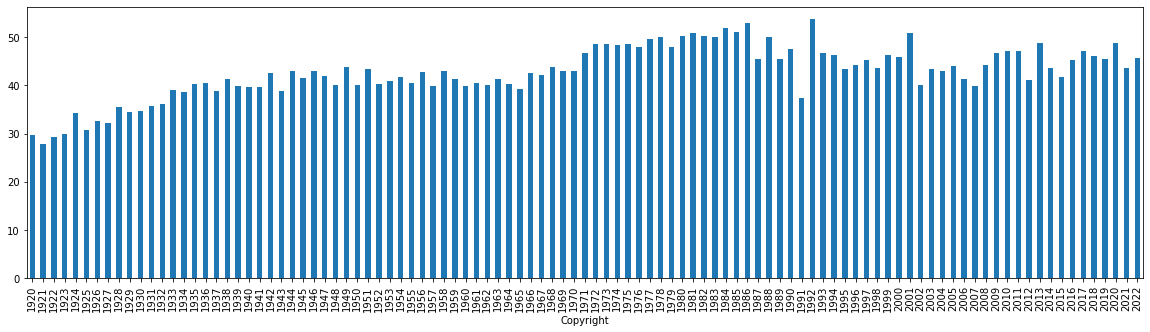

In [99]:
rezie.groupby("Copyright")["Věk"].mean().plot.bar(figsize=(20,5))

In [100]:
nejmladsi_reziseri = rezie.groupby("Copyright")["Věk"].min()

In [101]:
nejmladsi_reziseri[nejmladsi_reziseri >= 30]

Copyright
1934    32.0
1935    32.0
1942    31.0
1943    30.0
1945    32.0
1953    31.0
1955    31.0
1957    30.0
1960    30.0
1962    32.0
1968    30.0
1969    30.0
1971    32.0
1972    35.0
1973    34.0
1974    35.0
1975    30.0
1976    31.0
1977    32.0
1978    34.0
1980    30.0
1982    30.0
1983    30.0
1984    31.0
1985    31.0
1986    32.0
1987    30.0
1988    31.0
1990    31.0
2000    31.0
2001    32.0
2003    32.0
2020    30.0
2022    32.0
Name: Věk, dtype: float64

In [102]:
rezie[(rezie["Věk"] < 30) & (rezie["Copyright"].isin(range(1960,1991)))]

,Film,Copyright,Režie,Typologie,Délka,Jméno,Rok narození,Věk
1497,Uprchlík (396433),1961,Herrmann Zschoche (129164),hraný,dlouhometrážní,Herrmann Zschoche (129164),1934.0,27.0
1573,Křik (396542),1963,Jaromil Jireš (5317),hraný,dlouhometrážní,Jaromil Jireš (5317),1935.0,28.0
1591,Máte doma lva? (396539),1963,Pavel Hobl (7876),hraný,dlouhometrážní,Pavel Hobl (7876),1935.0,28.0
1592,Za pět minut sedm (396581),1964,Pavel Hobl (7876),hraný,dlouhometrážní,Pavel Hobl (7876),1935.0,29.0
1632,Démanty noci (396605),1964,Jan Němec (3041),hraný,dlouhometrážní,Jan Němec (3041),1936.0,28.0
1661,Místenka bez návratu (396596),1964,Dušan Klein (2568),hraný,dlouhometrážní,Dušan Klein (2568),1939.0,25.0
1685,Místenka bez návratu (396596),1964,Miroslav Sobota (54046),hraný,dlouhometrážní,Miroslav Sobota (54046),1935.0,29.0
1759,Nikdo se nebude smát (396650),1965,Hynek Bočan (2947),hraný,dlouhometrážní,Hynek Bočan (2947),1938.0,27.0
1760,Soukromá vichřice (396727),1967,Hynek Bočan (2947),hraný,dlouhometrážní,Hynek Bočan (2947),1938.0,29.0
1777,Ostře sledované vlaky (396694),1966,Jiří Menzel (7887),hraný,dlouhometrážní,Jiří Menzel (7887),1938.0,28.0


## Mluveno

In [103]:
mluveno = df.explode("Mluveno")

In [104]:
mluveno["Mluveno"].drop_duplicates().to_list()

['bez dialogů',
 'česky',
 'německy',
 'francouzsky',
 'anglicky',
 'komentář',
 'slovensky',
 'polsky',
 'rusínsky',
 'jidiš',
 'zpíváno',
 'maďarsky',
 'latinsky',
 'srbochorvatsky',
 'inuitsky',
 'rusky',
 'italsky',
 'hebrejsky',
 'čínsky',
 'tibetsky',
 'vietnamsky',
 'korejsky',
 'španělsky',
 'nizozemsky',
 'indonésky',
 'romsky',
 'portugalsky',
 'japonsky',
 'mongolsky',
 'bulharsky',
 'khmersky',
 'švédsky',
 'turecky',
 'ukrajinsky',
 None,
 'lotyšsky',
 'makedonsky',
 'řecky',
 'staroslověnsky',
 'fiktivním jazykem bandungštinou',
 'znakovou řečí',
 'finsky',
 'islandsky',
 'ázerbájdžánsky',
 'fiktivním jazyjkem',
 'šarišsky',
 'dánsky',
 'arménsky',
 'slovinsky',
 'albánsky',
 'chorvatsky',
 'srbsky',
 'rumunsky',
 'bosensky',
 'arabsky',
 'moldavsky',
 'nepálsky',
 'somálsky',
 'oromsky',
 'fiktivním jazykem aporverštinou',
 'navažsky',
 'bengálsky',
 'slezsky',
 'rwandsky',
 'svahilsky',
 'gruzínsky',
 'sámsky',
 'umělým jazykem mezislovanštinou',
 'hindsky',
 'persky',


<AxesSubplot:xlabel='Copyright'>

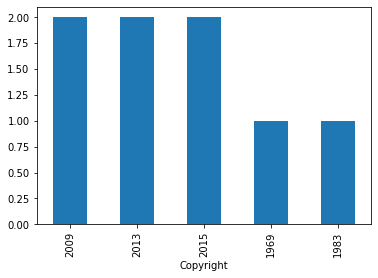

In [105]:
mluveno[mluveno["Mluveno"] == "romsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

In [106]:
mluveno[mluveno["Mluveno"] == "romsky"][["Film","Copyright"]].sort_values(by="Copyright")

,Film,Copyright
2161,Skřivánci na niti (396810),1969
2828,Radikální řez (397408),1983
3329,Černobílá v barvě (53571),1999
3362,Zpráva o putování studentů Petra a Jakuba (16884),2000
3581,Iné svety (45546),2006
3692,Ulovit miliardáře (118291),2009
3704,El Paso (65979),2009
3811,Cigán (166202),2011
3871,Až do města Aš (190372),2012
3921,Vojta Lavička: Nahoru a dolů (103360),2013


<AxesSubplot:xlabel='Copyright'>

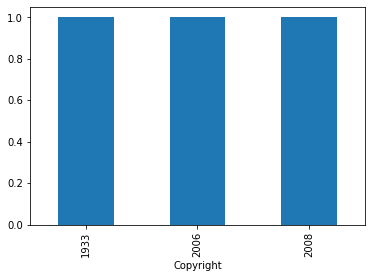

In [107]:
mluveno[mluveno["Mluveno"] == "rusínsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

<AxesSubplot:xlabel='Copyright'>

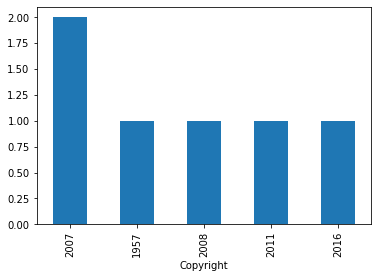

In [108]:
mluveno[mluveno["Mluveno"] == "vietnamsky"].groupby("Copyright")["Film"].nunique().nlargest().plot.bar()

## Rodiště

In [109]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [110]:
persony[persony["Osoba"] == "fyzická"].shape

(31149, 16)

In [111]:
persony[~persony["Město narození"].isnull()].shape

(9506, 16)

In [112]:
persony[(persony["Osoba"] == "fyzická") & (~persony["Město narození"].isnull())].shape

(9506, 16)

In [113]:
persony[persony["Město narození"] == "Praha"].shape

(3503, 16)

### Kontrola

In [114]:
persony[persony["Město narození"] == "Praha"].sample(10)

,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
7488,Willy Bauer (128687),128687,herec,fyzická,Wilhelm Friedrich Ferdinand Řeháček (rodné jmé...,None,1866-05-08T00:00:00.000,"Praha, Rakouské císařství",1938-06-04T00:00:00.000,"Praha, Československo",Praha,Rakouské císařství,Československo,Československo,1866.0,1938.0
11195,Václav S. Sadilek ml. (17448),17448,"scenárista, kameraman, režisér",fyzická,"Václav S. Sadilek, Václav Sadilek, Václav Sadi...",None,1982-11-21T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1982.0,NaN
7756,Jan David (128932),128932,"scenárista, režisér",fyzická,None,None,1938-06-17T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1938.0,NaN
30851,Petr Růžička (84192),84192,"herec, psycholog",fyzická,Petr Akčižůr (pseudonym),None,1963-03-23T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1963.0,NaN
9085,Helena Kubalíková (130200),130200,"herečka, tanečnice",fyzická,"Helena Karolína Kubalíková (rodné jméno), Hele...",None,1913-07-19T00:00:00.000,"Praha, Rakousko-Uhersko",1999-12-27T00:00:00.000,"Praha, Česká republika",Praha,Rakousko-Uhersko,Česká republika,Česká republika,1913.0,1999.0
23605,Radomír Pivoda (5890),5890,"dětský herec, právník",fyzická,None,None,1986-10-27T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1986.0,NaN
10685,Vladimír Plicka (15996),15996,kameraman,fyzická,None,None,1933-09-26T00:00:00.000,"Praha, Československo",2018-02-26T00:00:00.000,"Praha, Česká republika",Praha,Československo,Česká republika,Česká republika,1933.0,2018.0
7950,Vladimír Očenášek (129098),129098,"pedagog, dětský herec, vědecký pracovník",fyzická,"Ladislav Očenášek (chybný tvar), Láďa Očenášek",None,1956-02-03T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1956.0,NaN
28573,Marie Renčová (79712),79712,herečka,fyzická,"Marie Kružíková (rodné jméno), Marie Renčová (...",None,1987-09-23T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1987.0,NaN
9250,Lo Marsánová (130369),130369,herečka,fyzická,Olga Zdeňka Klára Marie Terezie Marsánová (rod...,None,1893-04-15T00:00:00.000,"Praha, Rakousko-Uhersko",19??,None,Praha,Rakousko-Uhersko,None,None,1893.0,19.0


In [115]:
with open(os.path.join("data_fixes", "1000nejcastejsich.json"), encoding="utf-8") as nejcastejsi:
    nejcastejsi = json.loads(nejcastejsi.read())

In [116]:
persony[(persony["Jméno"].isin(nejcastejsi)) & (persony["Město narození"] == "Praha")][["Jméno","Medailon","Rok narození","Místo narození"]].sample(20)

,Jméno,Medailon,Rok narození,Místo narození
6589,Vladimír Smíchovský (127807),herec,1876.0,"Praha, Rakousko-Uhersko"
11184,Jaroslav Brabec (1744),"kameraman, pedagog, režisér",1954.0,"Praha, Československo"
19607,Zdena Burdová (3897),herečka,1946.0,"Praha, Československo"
34762,Valentina Thielová (9488),"herečka, konferenciérka",1933.0,"Praha, Československo"
30293,František Marek (82932),herec,1904.0,"Praha, Rakousko-Uhersko"
16820,Jiří Zobač (3073),"herec, zvukař, hudební režisér",1939.0,"Praha, Československo"
19564,Miriam Kantorková (3863),herečka,1935.0,"Praha, Československo"
6081,Vladimír Řepa (127334),herec,1900.0,"Praha, Rakousko-Uhersko"
11473,Libuše Jahodová (18007),asistentka architekta,1938.0,"Praha, Československo"
14885,Václav Vydra nejml. (2666),"herec, podnikatel",1956.0,"Praha, Československo"


### Analýza

In [117]:
persony = pd.read_json(os.path.join("data", "persony.json"))

In [118]:
def rodiste(frame, persony, nelide, podil=float, n=int):
    
    pomery = {}
    vsichni = 0
    vyplneno = 0
    cesi = 0
    praha = 0
    
    for p in seznamy["profese"]:
                
        df_pracovni = frame[["Film",p]].explode(p)
        df_pracovni = df_pracovni[~df_pracovni[p].isin(nelide)] # vyfiltrujeme firmy, agentury, kapely atd.
        
        celkem = df_pracovni.groupby("Film")[p].nunique().sum() # poprvé sečteme všechny "člověkofilmy"
        
        persony_pracovni = persony[persony["Osoba"] == "fyzická"]
        
        df_pracovni = df_pracovni.merge(persony_pracovni[["Jméno","Osoba","Město narození","Stát narození"]], left_on = p, right_on = "Jméno")
        
        stats = []
        stats.append(celkem)
        
        df_pracovni = df_pracovni[(df_pracovni["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])) & (~df_pracovni["Město narození"].isnull())]
        
        celkem_cr = df_pracovni.groupby("Film")[p].nunique().sum() # sečteme člověkofilmy podruhé: narození v čr
        stats.append(celkem_cr)
        stats.append(celkem_cr / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Brno"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Ostrava"].groupby("Film")[p].nunique().sum() / celkem)
        stats.append(df_pracovni[df_pracovni["Město narození"] == "Plzeň"].groupby("Film")[p].nunique().sum() / celkem)
        
        praha = praha + df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum()
        cesi = cesi + celkem_cr
        vsichni = vsichni + celkem
        vyplneno = vyplneno + celkem_cr 
        
        pomery[p] = stats
    
    pomery = pd.DataFrame.from_dict(pomery).transpose().rename(columns={0: "Celkem", 1: "S údajem o narození v ČR", 2: "%", 3: "Praha", 4: "Brno", 5: "Ostrava", 6: "Plzeň"})
    
    print(f"Vyplněnost: {vyplneno/vsichni}\nPraha/všichni: {praha / vsichni}\nPraha/lidé z ČR: {praha / cesi}")
    
    return pomery[(pomery["%"] >= podil) & (pomery["S údajem o narození v ČR"] >= n)].sort_values(by="Praha",ascending=False)

In [119]:
rodiste(df, persony, nelide, podil=0.5, n=100)

Vyplněnost: 0.4536194084936765
Praha/všichni: 0.21175139018749078
Praha/lidé z ČR: 0.4668040789759167


,Celkem,S údajem o narození v ČR,%,Praha,Brno,Ostrava,Plzeň
Architekt,3011.0,2228.0,0.739954,0.368316,0.037861,0.006310,0.026569
Choreografie,279.0,178.0,0.637993,0.362007,0.028674,0.010753,0.000000
Režie,4733.0,3852.0,0.813860,0.358969,0.025565,0.012888,0.021551
Komentář,664.0,549.0,0.826807,0.352410,0.039157,0.006024,0.019578
Technický scénář,1452.0,1242.0,0.855372,0.341598,0.035813,0.015840,0.026860
"Hudba, text a zpěv písně",9594.0,6862.0,0.715239,0.333229,0.024703,0.009277,0.031895
Původní filmový námět,3493.0,2649.0,0.758374,0.320641,0.026625,0.013742,0.020326
Scénář,6926.0,5166.0,0.745885,0.316055,0.027722,0.009385,0.017470
Kamera,5531.0,3589.0,0.648888,0.308082,0.018442,0.001085,0.004882
Mluví,3488.0,2393.0,0.686067,0.305619,0.021789,0.012901,0.016342


In [120]:
rodiste(hcf[hcf["Copyright"] >= 1998], persony, nelide, podil=0, n=200)

C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2026485787.py:27: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(celkem_cr / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2026485787.py:28: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2026485787.py:29: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Brno"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2026485787.py:30: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Ostrava"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2026485787.py:31: RuntimeWarning: invalid value enco

Vyplněnost: 0.25312091503267975
Praha/všichni: 0.11351307189542484
Praha/lidé z ČR: 0.44845394099799885


,Celkem,S údajem o narození v ČR,%,Praha,Brno,Ostrava,Plzeň
Režie,656.0,542.0,0.826220,0.321646,0.018293,0.010671,0.021341
Kamera,800.0,394.0,0.492500,0.262500,0.011250,0.000000,0.006250
Původní filmový námět,470.0,319.0,0.678723,0.257447,0.023404,0.010638,0.017021
"Hudba, text a zpěv písně",2536.0,1404.0,0.553628,0.256703,0.014590,0.014590,0.018533
Scénář,1286.0,718.0,0.558320,0.215397,0.016330,0.003110,0.013219
Dramaturg,1182.0,380.0,0.321489,0.203046,0.005922,0.005076,0.000000
Producent,1436.0,564.0,0.392758,0.198468,0.009749,0.002786,0.002786
Výkonná produkce,813.0,207.0,0.254613,0.194342,0.002460,0.000000,0.000000
Mluví,754.0,283.0,0.375332,0.164456,0.018568,0.011936,0.003979
Střih,723.0,259.0,0.358230,0.153527,0.008299,0.000000,0.001383


In [121]:
napokusy = rodiste(hcf[hcf["Copyright"] >= 1998], persony, nelide, podil=0, n=200)

C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2026485787.py:27: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(celkem_cr / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2026485787.py:28: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Praha"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2026485787.py:29: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Brno"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2026485787.py:30: RuntimeWarning: invalid value encountered in longlong_scalars
  stats.append(df_pracovni[df_pracovni["Město narození"] == "Ostrava"].groupby("Film")[p].nunique().sum() / celkem)
C:\Users\micha\AppData\Local\Temp\ipykernel_28112\2026485787.py:31: RuntimeWarning: invalid value enco

Vyplněnost: 0.25312091503267975
Praha/všichni: 0.11351307189542484
Praha/lidé z ČR: 0.44845394099799885


In [122]:
napokusy["Praha / Brno"] = napokusy["Praha"] / napokusy["Brno"]
napokusy.sort_values(by="Praha / Brno")

,Celkem,S údajem o narození v ČR,%,Praha,Brno,Ostrava,Plzeň,Praha / Brno
Spolupráce,3813.0,257.0,0.067401,0.038815,0.005507,0.000000,0.000525,7.047619
Mluví,754.0,283.0,0.375332,0.164456,0.018568,0.011936,0.003979,8.857143
Hrají,25235.0,7418.0,0.293957,0.116307,0.011888,0.010065,0.006142,9.783333
Původní filmový námět,470.0,319.0,0.678723,0.257447,0.023404,0.010638,0.017021,11.000000
Scénář,1286.0,718.0,0.558320,0.215397,0.016330,0.003110,0.013219,13.190476
Režie,656.0,542.0,0.826220,0.321646,0.018293,0.010671,0.021341,17.583333
"Hudba, text a zpěv písně",2536.0,1404.0,0.553628,0.256703,0.014590,0.014590,0.018533,17.594595
Střih,723.0,259.0,0.358230,0.153527,0.008299,0.000000,0.001383,18.500000
Producent,1436.0,564.0,0.392758,0.198468,0.009749,0.002786,0.002786,20.357143
Kamera,800.0,394.0,0.492500,0.262500,0.011250,0.000000,0.006250,23.333333


In [123]:
reziehcf = df[["Režie","Copyright","Film","Typologie","Délka"]].explode("Režie").explode("Typologie")
reziehcf = reziehcf[(reziehcf["Délka"] == "dlouhometrážní") & (reziehcf["Typologie"] == "hraný")]

In [124]:
reziehcf.merge(persony, left_on = "Režie", right_on = "Jméno")

,Režie,Copyright,Film,Typologie,Délka,Jméno,Id,Medailon,Osoba,Alternativní jména,Životopis,Datum narození,Místo narození,Datum úmrtí,Místo úmrtí,Město narození,Stát narození,Město úmrtí,Stát úmrtí,Rok narození,Rok úmrtí
0,Vladimír Majer (56169),1920,Magdalena (395221),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
1,Vladimír Majer (56169),1921,Manželé paní Mileny (395251),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
2,Vladimír Majer (56169),1934,Rozpustilá noc (395643),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
3,Vladimír Majer (56169),1934,V cizím revíru (395638),hraný,dlouhometrážní,Vladimír Majer (56169),56169,"scenárista, herec, režisér",fyzická,Vladimír Rudolf Antonín Majer (rodné jméno),None,1894-02-21T00:00:00.000,"Plzeň, Rakousko-Uhersko",1957-11-05T00:00:00.000,"Praha, Československo",Plzeň,Rakousko-Uhersko,Československo,Československo,1894.0,1957.0
4,Sidney M. Goldin (127619),1920,Tam na horách (395228),hraný,dlouhometrážní,Sidney M. Goldin (127619),127619,"scenárista, herec, producent, režisér",fyzická,Samuel Goldstein (rodné jméno),None,1878-03-25T00:00:00.000,"Oděsa, Ruská říše",1937-09-19T00:00:00.000,"New York City, New York, USA",Oděsa,Ruská říše,New York,New York,1878.0,1937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,Jan Foukal (19192),2021,Marťanské lodě (402153),hraný,dlouhometrážní,Jan Foukal (19192),19192,"scenárista, režisér",fyzická,"Jan Foukal (rodné jméno), Jan Fukino Foukal","JAN FOUKAL (nar. 11.8.1979, Praha) chodil do z...",1979-08-11T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1979.0,NaN
2989,Jiří Diviš (9927),2021,Město (402235),hraný,dlouhometrážní,Jiří Diviš (9927),9927,"scenárista, producent, režisér",fyzická,JDI Pictures,None,1975-04-25T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1975.0,NaN
2990,Jiří Diviš (9927),2021,Město (402235),hraný,dlouhometrážní,Jiří Diviš (9927),9927,"scenárista, producent, režisér",fyzická,JDI Pictures,None,1975-04-25T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1975.0,NaN
2991,Daniela Špinar (1700),2022,Idiot (402230),hraný,dlouhometrážní,Daniela Špinar (1700),1700,"scenáristka, herečka, organizační pracovnice, ...",fyzická,Daniel Špinar (rodné jméno),None,1979-07-07T00:00:00.000,"Praha, Československo",None,None,Praha,Československo,None,None,1979.0,NaN


In [125]:
reziehcf = reziehcf.merge(persony, left_on = "Režie", right_on = "Jméno")

<AxesSubplot:xlabel='Copyright'>

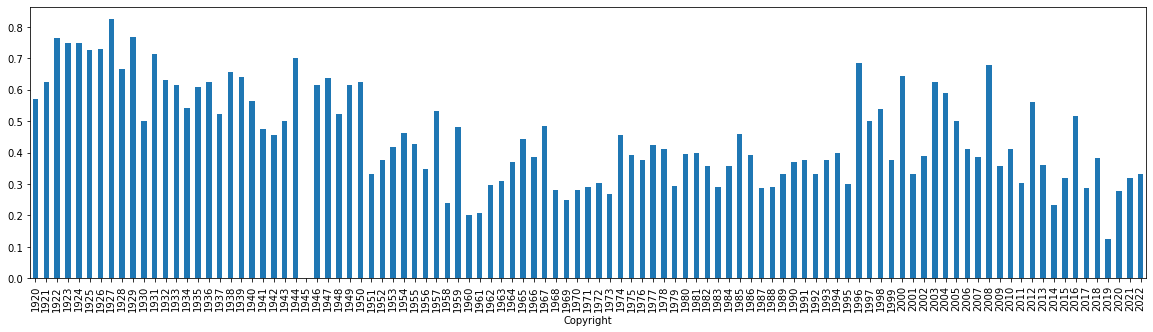

In [126]:
pd.Series(reziehcf[reziehcf["Město narození"] == "Praha"].groupby("Copyright")["Film"].nunique() / reziehcf[reziehcf["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])].groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

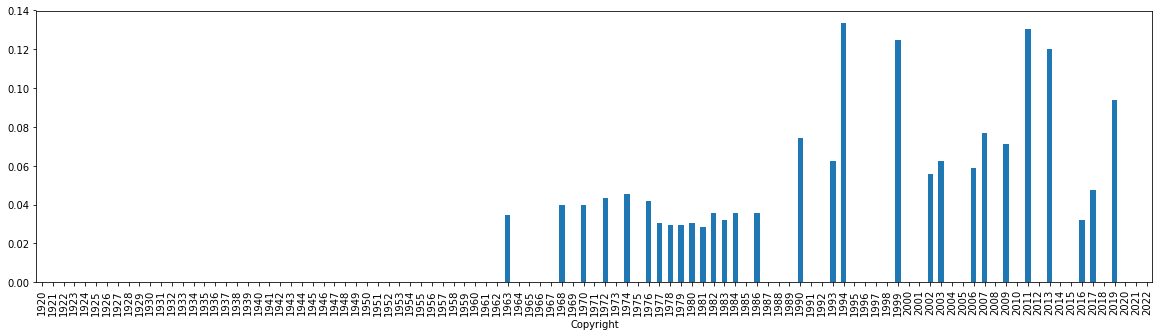

In [127]:
pd.Series(reziehcf[reziehcf["Město narození"] == "Bratislava"].groupby("Copyright")["Film"].nunique() / reziehcf[reziehcf["Stát narození"].str.strip().isin(["Československo","Rakousko-Uhersko","Česká republika"])].groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

## Slováctvo

In [128]:
profese = seznamy["profese"]

In [129]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

In [130]:
df["Lidé"] = df[profese].values.tolist()
df["Lidé"] = df["Lidé"].apply(lambda x: plose_jednoduse(x))

In [131]:
slovaci = df.explode("Lidé")

In [132]:
slovaci = slovaci.merge(persony, left_on="Lidé", right_on="Jméno")

<AxesSubplot:xlabel='Copyright'>

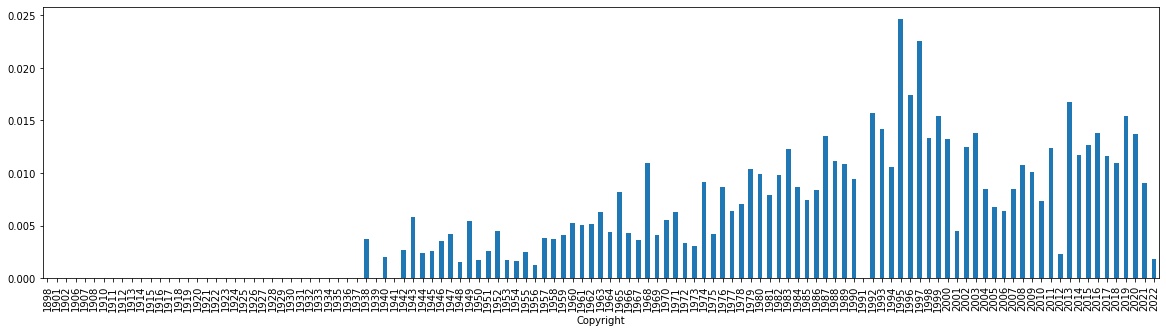

In [133]:
pd.Series(slovaci[slovaci["Město narození"] == "Bratislava"].groupby("Copyright")["Lidé"].nunique() / slovaci.groupby("Copyright")["Lidé"].nunique()).plot.bar(figsize=(20,5))

In [134]:
slovaci = slovaci.merge

## Kolik filmů spískal Státní fond kinematografie?

In [135]:
podpora = hcf.explode("S podporou")

In [136]:
podpora[podpora["Copyright"] >= 1998].groupby("S podporou")["Film"].nunique().nlargest(15)

S podporou
Státní fond České republiky pro podporu a rozvoj české kinematografie (90421)    193
Státní fond kinematografie (124966)                                              192
Audiovizuálny fond (123056)                                                       84
Ministerstvo kultúry Slovenskej republiky (113236)                                56
Media Programme EU (123258)                                                       50
Program podpory filmového průmyslu (123266)                                       42
Eurimages (107036)                                                                38
Filmová nadace (103156)                                                           14
Polski Instytut Sztuki Filmowej (114937)                                          12
Magistrát hlavního města Prahy (99476)                                            10
Ministerstvo kultury České republiky (92178)                                      10
Jihomoravský filmový nadační fond (110676)            

<AxesSubplot:xlabel='Copyright'>

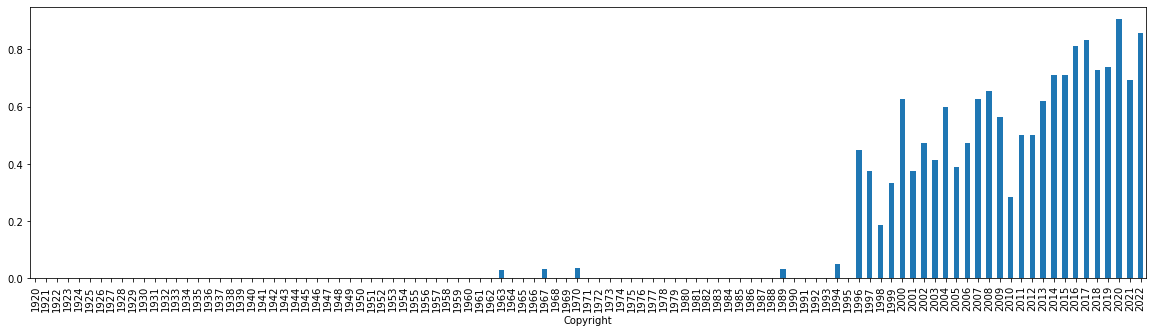

In [137]:
pd.Series(podpora[podpora["S podporou"].isin(["Státní fond kinematografie (124966)","Státní fond České republiky pro podporu a rozvoj české kinematografie (90421)"])].groupby("Copyright")["Film"].nunique() / podpora.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

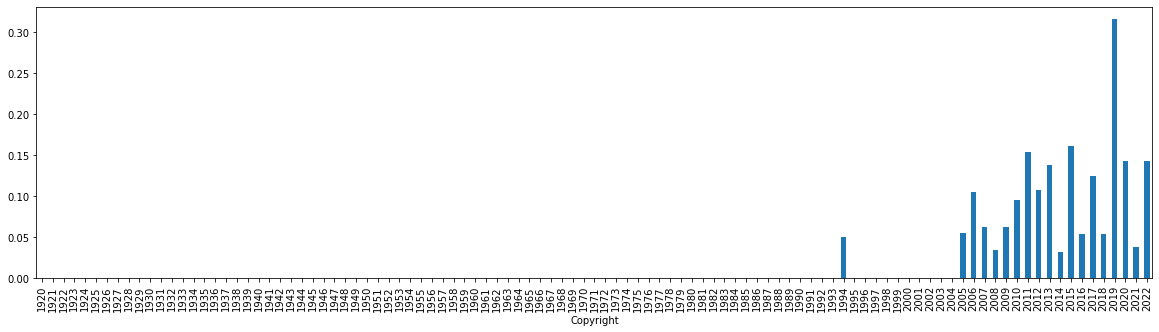

In [138]:
pd.Series(podpora[podpora["S podporou"] == "Media Programme EU (123258)"].groupby("Copyright")["Film"].nunique() / podpora.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))